Successfully loaded the iris dataset.

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Descriptive statistics:
       sepal_length  sepal_width  

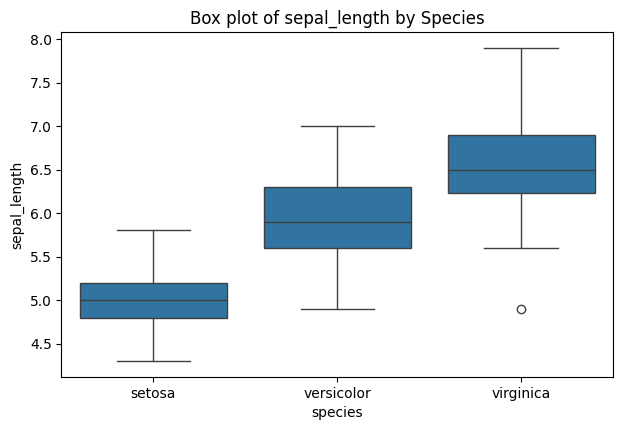

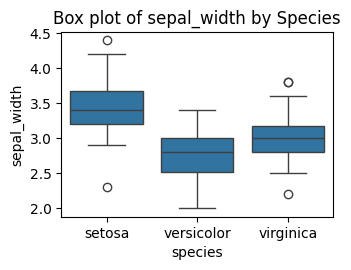

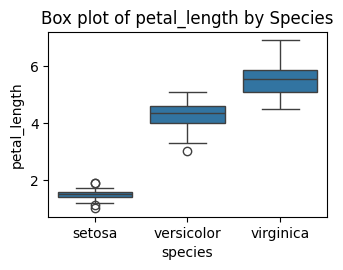

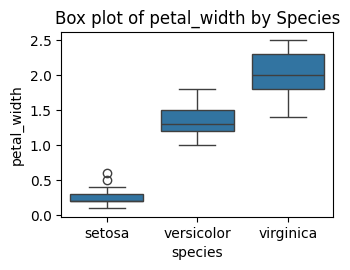

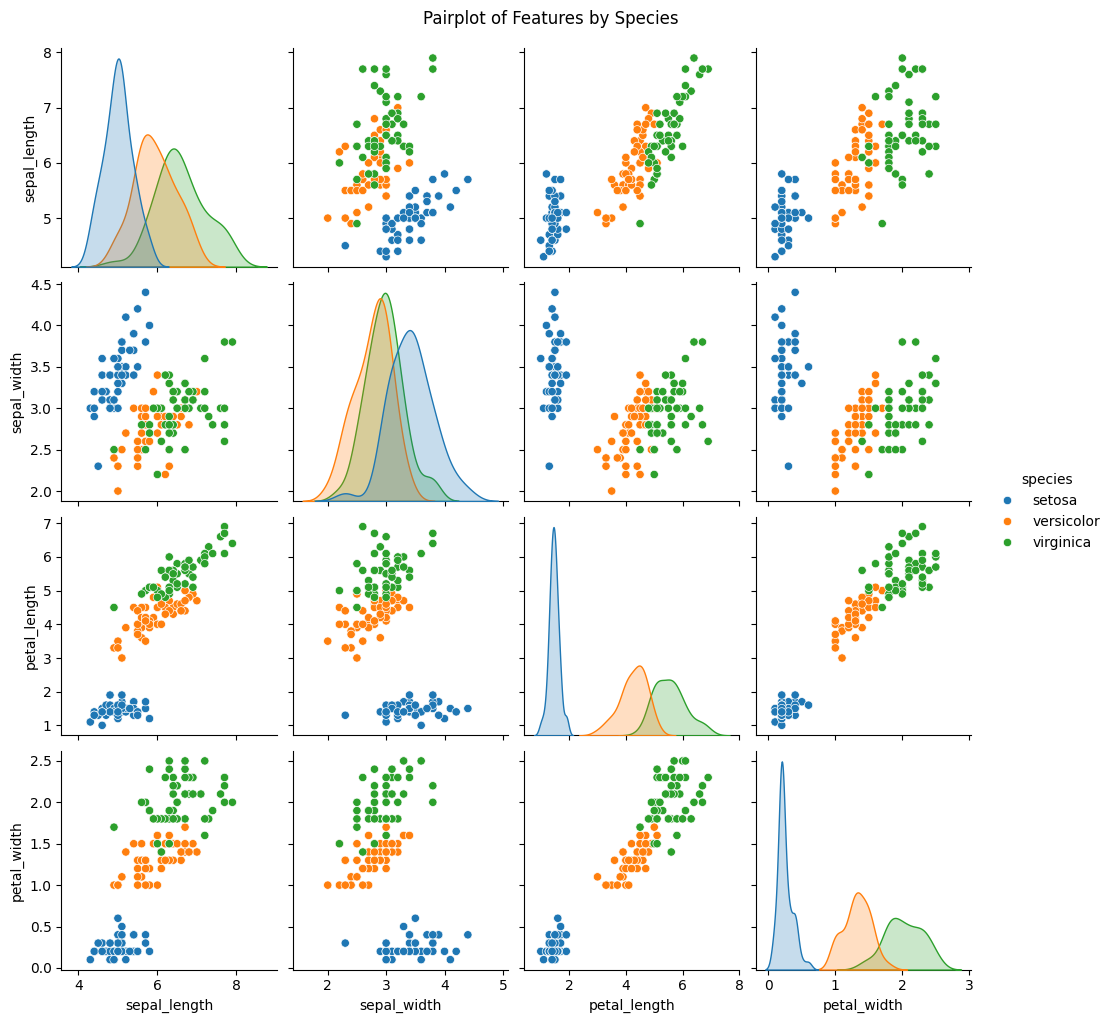


Basic Outlier Detection (using IQR for numerical features):

No significant outliers found in column 'sepal_length' using IQR.

Outliers in column 'sepal_width':
    sepal_length  sepal_width  petal_length  petal_width     species
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor

No significant outliers found in column 'petal_length' using IQR.

No significant outliers found in column 'petal_width' using IQR.


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(dataset_name):
    """Loads a dataset using seaborn with basic error handling."""
    try:
        data = sns.load_dataset(dataset_name)
        print(f"Successfully loaded the {dataset_name} dataset.")
        return data
    except Exception as e:
        print(f"Error loading the {dataset_name} dataset: {e}")
        return None

def perform_eda(df):
    """Performs basic exploratory data analysis."""
    if df is None:
        return

    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    print("\nInformation about the dataset:")
    df.info()

    print("\nDescriptive statistics:")
    print(df.describe())

    print("\nDistribution of the target variable (if 'species' column exists):")
    if 'species' in df.columns:
        print(df['species'].value_counts())
    else:
        print("Target variable 'species' not found.")

    # Check for missing values
    print("\nMissing values:")
    print(df.isnull().sum())

def visualize_data(df):
    """Creates visualizations of the dataset."""
    if df is None:
        return

    # Calculate the correlation matrix
    print("\nCorrelation matrix:")
    if len(df.select_dtypes(include=['number']).columns) > 0:
        print(df.corr(numeric_only=True))
    else:
        print("No numerical features to calculate correlation.")

    # Create box plots for each feature grouped by the target variable (if it exists)
    if 'species' in df.columns:
        plt.figure(figsize=(12, 8))
        num_cols = len(df.columns) - 1 # Exclude the target variable
        for i, column in enumerate(df.columns[:-1]):
            plt.subplot(2, 2, i + 1)
            sns.boxplot(x='species', y=column, data=df)
            plt.title(f'Box plot of {column} by Species')
            plt.tight_layout()
            plt.show()

        # Create a pair plot
        sns.pairplot(df, hue='species')
        plt.suptitle("Pairplot of Features by Species", y=1.02)
        plt.show()
    else:
        print("\n'species' column not found, skipping box plots and pair plot based on species.")

# --- Main execution ---
if __name__ == "__main__":
    iris_data = load_data('iris')
    if iris_data is not None:
        perform_eda(iris_data)
        visualize_data(iris_data)

        # Basic outlier detection (example using IQR for numerical features)
        print("\nBasic Outlier Detection (using IQR for numerical features):")
        for column in iris_data.select_dtypes(include=['number']).columns:
            Q1 = iris_data[column].quantile(0.25)
            Q3 = iris_data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = iris_data[(iris_data[column] < lower_bound) | (iris_data[column] > upper_bound)]
            if not outliers.empty:
                print(f"\nOutliers in column '{column}':")
                print(outliers)
            else:
                print(f"\nNo significant outliers found in column '{column}' using IQR.")